In [2]:
from feature_extractors.SIFT import *
from feature_extractors.HESIFT import *
import cv2
# Show the figures / plots inside the notebook
%matplotlib inline

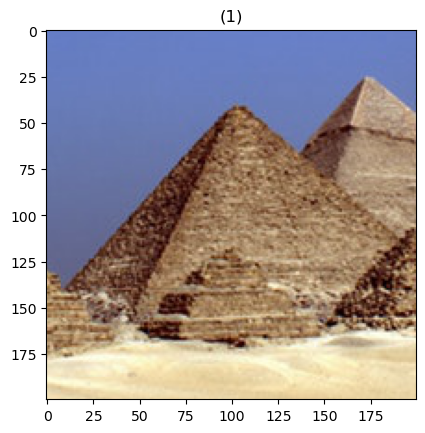

In [3]:
# Preparing the test image
RGB_image = io.imread("images/pyramids.jpeg")
RGB_image = RGB_image[500:700, 200:400]
show_images([RGB_image])

In [35]:
sift = cv2.SIFT_create(sigma = 0.4)
keypoints, descriptors = sift.detectAndCompute((rgb2gray(RGB_image)*255).astype(np.uint8), None)

In [36]:
len(keypoints)

2933

In [11]:
homomorphic_keypoints, homomorphic_descriptors = HESIFT(RGB_image)

Generating base image...
Generating Gaussian Kernels...
Generating Gaussian images...
Octave 1 Running:
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Octave 1 Done!!!
-----------------------------------------------------------------------
Octave 2 Running:
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Octave 2 Done!!!
-----------------------------------------------------------------------
Octave 3 Running:
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Octave 3 Done!!!
-----------------------------------------------------------------------
Octave 4 Running:
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Octave 4 Done!!!
-----------------------------------------------------------------------
Octave 5 Running:
Convolution Done!
Convolution Done!


In [39]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors, homomorphic_descriptors)
matches = sorted(matches, key = lambda x:x.distance)

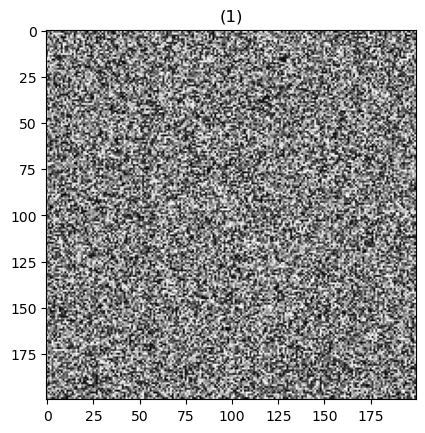

In [24]:
encryptedImage = encryptImage((rgb2gray(RGB_image) * 255).astype(np.int64))
show_images([encryptedImage.astype(np.uint8)])

In [40]:
matching_result = cv2.drawMatches(RGB_image, keypoints, encryptedImage.astype(np.uint8), homomorphic_keypoints, matches, None)

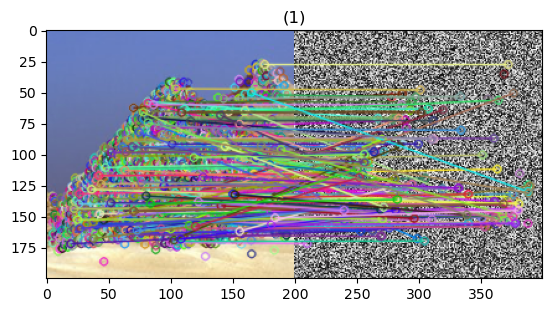

In [41]:
show_images([matching_result])

In [42]:
len(matches)

162

(482, 599, 3)
(482, 599, 3)
(160, 199, 3)


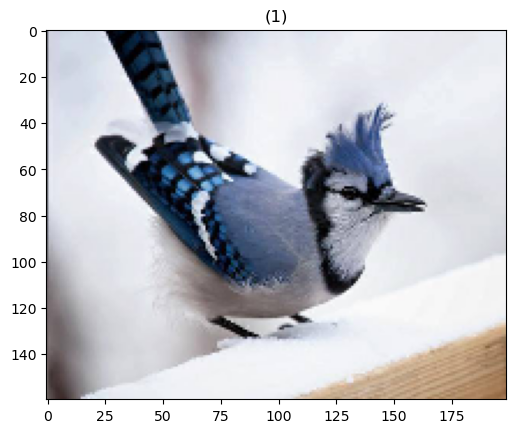

In [55]:
# Preparing the test image
RGB_image = io.imread("images/bird.jpg")
print(RGB_image.shape)
RGB_image = RGB_image[:, :]
print(RGB_image.shape)
RGB_image = resize(RGB_image, (int(RGB_image.shape[1] / 3), int(RGB_image.shape[0] / 3)), interpolation=INTER_NEAREST)
print(RGB_image.shape)
show_images([RGB_image])

In [56]:
keypoints2, descriptors2 = sift.detectAndCompute((rgb2gray(RGB_image)*255).astype(np.uint8), None)

In [57]:
matches = bf.match(descriptors2, homomorphic_descriptors)
matches = sorted(matches, key = lambda x:x.distance)

In [58]:
len(matches)

95

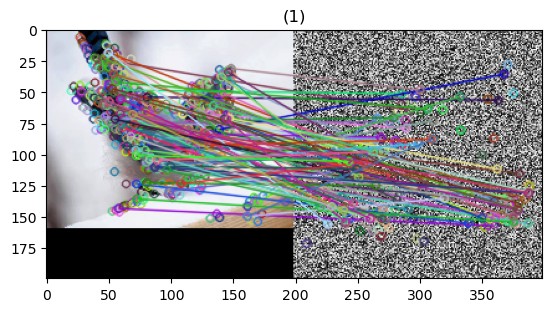

In [59]:
matching_result = cv2.drawMatches(RGB_image, keypoints2, encryptedImage.astype(np.uint8), homomorphic_keypoints, matches, None)
show_images([matching_result])